# Índice do Efeito de Empacotamento ($Q_{a}^*$)

Para estimar o índice do efeito de empacotamento da Bricaud et al. (2004):

$${Q_{a}^*}(\lambda) = a_{ph} (\lambda) / a_{sol} (\lambda) $$

Onde $a_{ph} (\lambda)$ seria medido da amostra e o  $a_{sol} (\lambda) $ seria o coeficiente e absorção caso os pigmentos estivessem na solução.

Mas antes é necessário estimar o $a_{sol}$, que é igual a somatória da concentração de cada pigmento vezes seu respectivo coeficiente de absorção especifico :

$$ a_{sol} (\lambda) = \sum C_{i}.a_{sol, i}^*(\lambda) $$

Gráfico dos $a_{sol, i}^*(\lambda)$ de cada pigmento dado pelo HPLC:

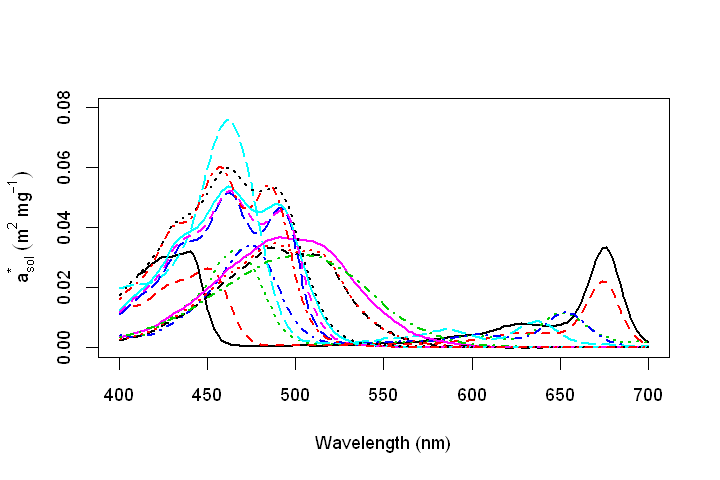

In [14]:
library(repr)
#Carregando o arquivo que tem os coeficientes de absorção de cada pigmento Bricaud et al (2004)
bricaud_asol = read.csv("Bricaud_et_al_2004.csv",  skip=4, na="999")
#Padronizando os nomes dos pigmentos
names(bricaud_asol)=c("lambda", "Chla", "DVChla", "Chlb", "DVChlb", "Chlc12", "Fuco", "ButFuco", "HexFuco", "Perid", "Diad", "Zea", "Allox", "betacar", "acar")
options(repr.plot.width=6, repr.plot.height=4)
#Plotando todos os pigmentos no mesmo gráfico
matplot(bricaud_asol$lambda, bricaud_asol[,2:15], type="l",ylab="" ,
        xlab="Wavelength (nm)", ylim=c(0,0.08), cex.lab=0.9, cex.axis=0.9, lwd=rep(2,14))

mtext(side=2, line=2.5, expression(a[sol]^{'*'}~('m'^{2}~"mg"^{-1})), cex=0.9)

Agora vamos pegar um resultado de HPLC hipotético e estimar o $a_{sol}(\lambda)$:

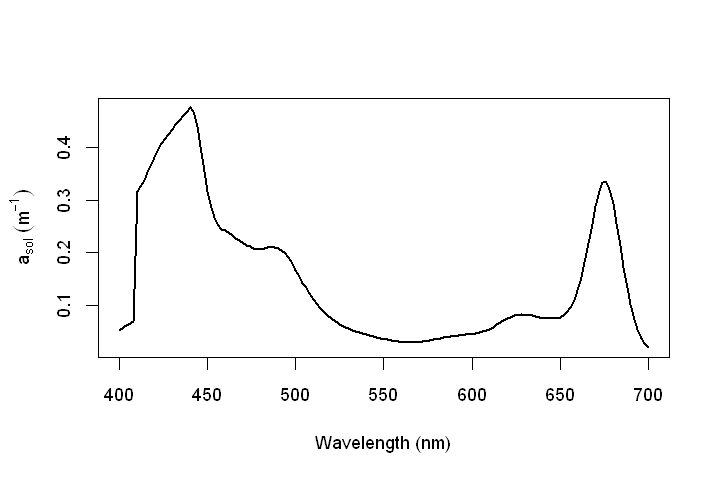

In [43]:
HPLC = data.frame("Chla"=10, "DVChla"=0.001, 
                  "Chlb"=0.03, "DVChlb"=0.01, "Chlc12"=0.3, "Fuco"=1.1, 
                  "ButFuco"=0.001, "HexFuco"=0.005, "Perid"=0.5, "Diad"=0.01,
                  "Zea"=1.5, "Allox"=0.05, "betacar"=1, "acar"=0.3)
asol=data.frame(wv=bricaud_asol$lambda)
for (i in names(HPLC)){
# multiplicado cada concentração e pigmento coms eu respectivo coeficiente de absorção específico
  asol=cbind(asol, HPLC[,i]*bricaud_asol[,i])
}
#Somatória dos asol de todos os pigmentos para cada comprimento de onda 
asol_t = rowSums(asol[,-1], na.rm = T)
options(repr.plot.width=6, repr.plot.height=4)
plot(asol$wv, asol_t, type="l",  xlab="Wavelength (nm)", ylab="", cex.lab=0.9, cex.axis=0.9, lwd=2)
mtext(side=2, line=2.5, expression(a[sol]~('m'^{-1})), cex=0.9)

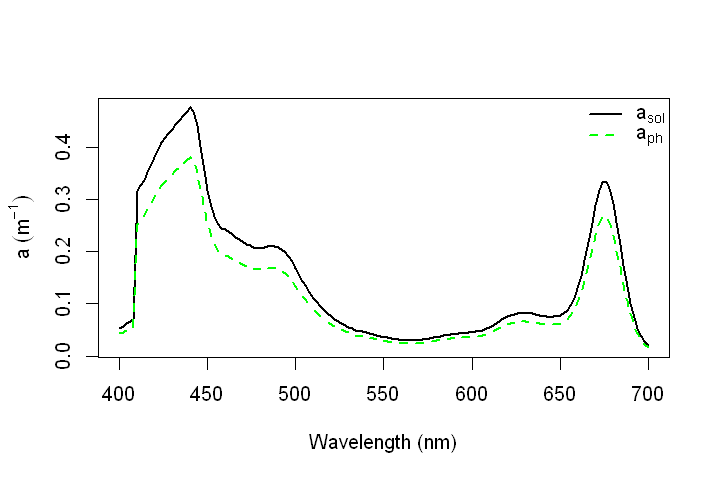

In [45]:
aph=asol_t*0.8
options(repr.plot.width=6, repr.plot.height=4)
matplot(asol$wv, cbind(asol_t, aph), type="l", lw=c(2,2), 
        col=c("black", "green"), lt=c(1,2), xlab="Wavelength (nm)", ylab="")
mtext(side=2, line=2.5, expression(a~('m'^{-1})))
legend("topright", legend=c(expression(a[sol]), 
                            expression(a[ph])),lt=c(1,2), lw=c(2,2), col=c("black", "green"), y.intersp=2, bty="n")

Estimando o $Q_{a}^*(440)$ e o $Q_{a}^*(676)$

In [17]:
a_todos = data.frame(wv=seq(400,700,2), "aph"=aph, "asol_t"=asol_t)
Qa_440 = a_todos[which(a_todos$wv==440), "aph"]/a_todos[which(a_todos$wv==440), "asol_t"]
Qa_676 = a_todos[which(a_todos$wv==676), "aph"]/a_todos[which(a_todos$wv==676), "asol_t"]
Qa_440
Qa_676

[1] 0.8

[1] 0.8

## $Q_{a}$ em diferentes tamanhos de células 

Seguindo o que é apresentado do artigo Bricaud et al. (2004), plotar o $Q_{a}^*$ considerando coeficientes da absorção do conteúdo celular ($acm$) diferentes, nesse exemplo vamos considerar no $\lambda = 440nm$

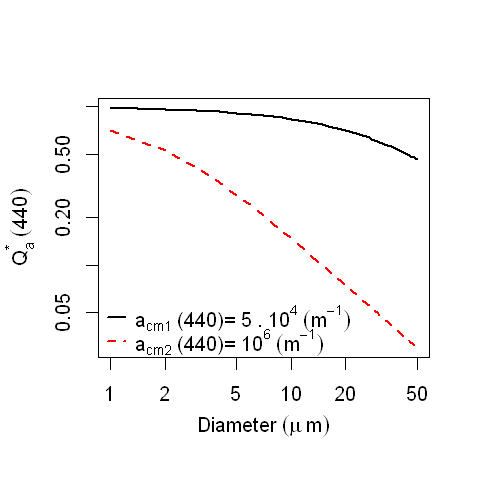

In [36]:
#Coeficiente de absorção do conteudo celular no 440nm
acm.440.1=5*10^4 #menos absorvente
acm.440.2= 10^6 #mais absorvente

#Intervalo de diametros das células
d=(1:50)*10^-6 
#Estimando o Qa (440) para os diferentes tamanhos
Qa.acm.1 = 1+(2*exp(-acm.440.1*d)/(acm.440.1*d)+2*(exp(-acm.440.1*d)-1)/(acm.440.1*d)^2)
Qa.acm.2 = 1+ (2*exp(-acm.440.2*d)/(acm.440.2*d)+2*(exp(-acm.440.2*d)-1)/(acm.440.2*d)^2)

Qa.1=(3/2)*Qa.acm.1/(acm.440.1*d)
Qa.2=(3/2)*Qa.acm.2/(acm.440.2*d)

df<- data.frame(d=1:50,Qa.1= Qa.1, Qa.2= Qa.2)
options(repr.plot.width=4, repr.plot.height=4)
#Plotando as curvas
matplot(df$d, df[, c("Qa.1", "Qa.2")], type="l", log="xy", xlab="", ylab="", lwd=c(2,2))
mtext(side=2, line=2.5, expression(Q[a]^{'*'}~(440)))
mtext(side=1, line=2.5, expression("Diameter"~(mu~m)))
legend("bottomleft", legend=c(expression(a["cm1"]~"(440)="~5~"."~10^{4}~(m^{-1})), expression(a["cm2"]~"(440)="~10^{6}~(m^{-1}))), 
       col=c("black", "red"), lty=c(1,2), lwd=c(2,2), bty="n", y.intersp=2)
       



# Índice de tamanho  ($S_{f}$)

O índice de tamanho foi elaborado com fundamento teórico que células apresentariam maior indice de empacotamento e teriam uma curva mais achatada para o coeficiente de absorção específico ($a_{ph}^*$) (Ciotti et al., 2002). Experimentalmente Ciotti et al. (2002) obtiveram curvas bases de referencia para amostras dominadas por picoplancton e outra para amostras dominadas por microplancton. Sendo o $S_{f}$ um indice que indicaria a proporção dessas classes de tamanho para a comunidade amostrada. Seguindo a seguinte equação:

$$\hat{a}_{ph} = [S_{f} . \bar{a}_{pico}(\lambda)]+[(1-S_{f}) . \bar{a}_{micro}(\lambda)]$$

onde $\hat{a}_{ph}$ é o coeficiente de absorção do fitoplancton normalizado e $\bar{a}_{pico}$ e $\bar{a}_{micro}$ são  os vetores bases obtidos por Ciotti et. al (2002, 2006) para o pico e microplancton, respectivamente.

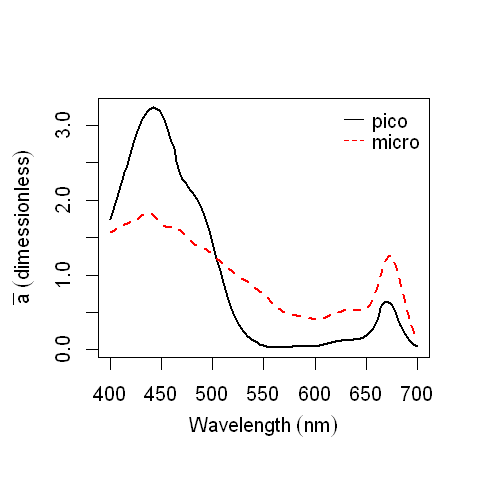

In [37]:
#Vetores base para o pico e micro Ciotti et al(2002,2006)
pico =c(1.7439,1.8264,1.9128,1.9992,2.0895,2.1799,2.2702,2.3684,2.4666,2.5687,2.6669,2.7612,2.8437,2.9183,2.9890,3.0479,3.1029,3.1500,3.1854,3.2089,3.2247,3.2325,3.2286,3.2168,3.1932,3.1540,3.1029,3.0361,2.9576,2.8712,2.7848,2.6944,2.5137,2.4273,2.3488,2.2781,2.2486,2.2192,2.1720,2.1328,2.1013,2.0660,2.0267,1.9835,1.9285,1.8657,1.7989,1.7203,1.6339,1.5357,1.4336,1.3276,1.2176,1.1076,1.0016,0.8994,0.8013,0.7109,0.6284,0.5538,0.4870,0.4320,0.3782,0.3307,0.2875,0.2486,0.2137,0.1842,0.1599,0.1402,0.1233,0.1080,0.0935,0.0789,0.0656,0.0530,0.0424,0.0344,0.0290,0.0260,0.0258,0.0268,0.0304,0.0320,0.0331,0.0347,0.0355,0.0363,0.0382,0.0401,0.0416,0.0428,0.0432,0.0432,0.0432,0.0424,0.0416,0.0408,0.0408,0.0424,0.0452,0.0503,0.0562,0.0628,0.0695,0.0758,0.0821,0.0880,0.0939,0.1002,0.1060,0.1123,0.1178,0.1229,0.1261,0.1280,0.1288,0.1296,0.1308,0.1331,0.1371,0.1422,0.1493,0.1591,0.1728,0.1909,0.2137,0.2416,0.2757,0.3178,0.3692,0.4281,0.5499,0.6009,0.6324,0.6402,0.6324,0.6245,0.5892,0.5342,0.4674,0.3967,0.3276,0.2635,0.2078,0.1618,0.1249,0.0958,0.0746,0.0601,0.0503)
micro=c(1.574,1.584,1.600,1.617,1.633,1.654,1.669,1.674,1.684,1.697,1.708,1.710,1.716,1.737,1.763,1.793,1.812,1.827,1.830,1.834,1.824,1.800,1.771,1.741,1.712,1.685,1.667,1.650,1.641,1.631,1.631,1.623,1.616,1.606,1.592,1.568,1.542,1.509,1.481,1.459,1.437,1.415,1.399,1.387,1.377,1.367,1.349,1.338,1.319,1.301,1.271,1.242,1.222,1.196,1.169,1.141,1.118,1.096,1.075,1.057,1.035,1.013,0.992,0.977,0.959,0.944,0.927,0.909,0.888,0.868,0.847,0.826,0.806,0.785,0.764,0.737,0.711,0.682,0.653,0.626,0.604,0.580,0.555,0.535,0.514,0.501,0.487,0.478,0.475,0.468,0.464,0.459,0.452,0.452,0.449,0.443,0.433,0.424,0.416,0.406,0.401,0.400,0.403,0.408,0.416,0.429,0.443,0.458,0.473,0.487,0.495,0.499,0.504,0.514,0.521,0.525,0.532,0.535,0.534,0.535,0.532,0.528,0.526,0.528,0.538,0.549,0.574,0.605,0.655,0.720,0.798,0.889,0.979,1.068,1.147,1.207,1.243,1.249,1.227,1.174,1.096,1.004,0.893,0.767,0.635,0.516,0.409,0.323,0.253,0.200,0.158)
#Intervalo do comprimento de ondas
wv = seq(400,700,2)

df=data.frame(wv=wv, pico=pico, micro=micro)
#Plotando o gráfico
matplot(df$wv, df[,c("pico", "micro")],type="l", xlab="", ylab="", lwd=2)
mtext(side=2, line=2.5, expression(bar(a)~("dimessionless")))
mtext(side=1, line=2.5, expression("Wavelength"~(nm)))
legend(x=620, y=3.3, legend=c("pico","micro"), col=c("black","red") , lty=c(1,2), bty="n", y.intersp=2)

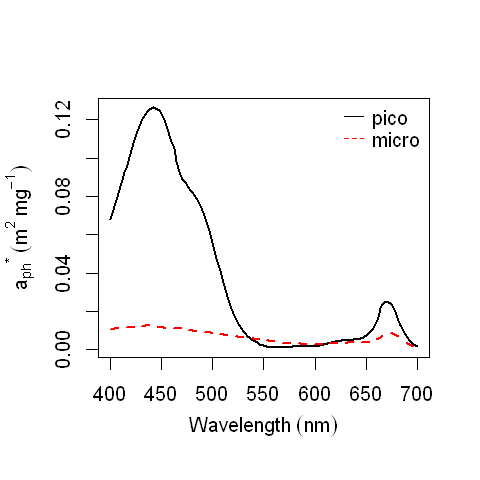

In [38]:
pico_esp = pico* 0.023 / 0.5892
micro_esp = micro * 0.0086 / 1.249 
df_esp = data.frame(wv=wv, pico=pico_esp, micro=micro_esp)
matplot(df_esp$wv, df_esp[,c("pico", "micro")],type="l", xlab="", ylab="", lwd=2)
mtext(side=2, line=2.5, expression({a[ph]}^{"*"}~(m^{2}~mg^{-1})))
mtext(side=1, line=2.5, expression("Wavelength"~(nm)))
legend(x=620, y=0.13, legend=c("pico","micro"), col=c("black","red") , lty=c(1,2), bty="n", y.intersp=2)

Considerando a relação estabelecida podemos simular um uma curva de $a_{ph}^*$ a partir dos vetores base:

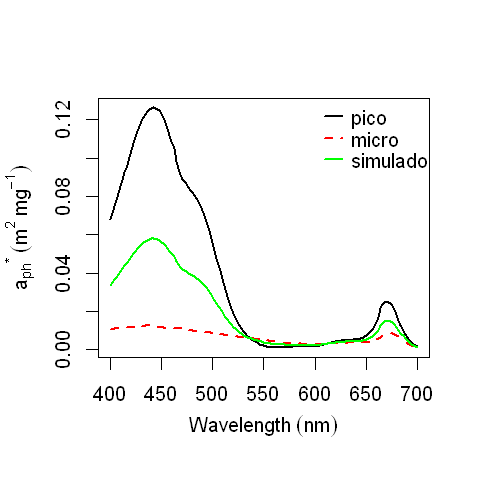

In [40]:
Sf = 0.4
aph_simulado = (pico_esp*Sf) + ((1-Sf)*micro_esp)
matplot(df_esp$wv, df_esp[,c("pico", "micro")],type="l", xlab="", ylab="", lwd=2)
matlines(df_esp$wv, aph_simulado, col="green", lwd=2)
mtext(side=2, line=2.5, expression({a[ph]}^{"*"}~(m^{2}~mg^{-1})))
mtext(side=1, line=2.5, expression("Wavelength"~(nm)))
legend(x=600, y=0.13, legend=c("pico","micro", "simulado"), col=c("black","red", "green") , lty=c(1,2,1), lwd=rep(2,3), bty="n", y.intersp=2)

# Referências

1. Bricaud, A., Claustre, H., Ras, J., Oubelkheir, K., 2004. Natural variability of phytoplanktonic absorption in oceanic waters: Influence of the size structure of algal populations. J. Geophys. Res. Ocean. 109, 1–12. https://doi.org/10.1029/2004JC002419
2. Ciotti, A.M., Bricaud, A., 2006. Retrievals of a size parameter for phytoplankton and spectral light absorption by colored detrital matter from water-leaving radiances at SeaWiFS channels in a continental shelf region off Brazil. Limnol. Oceanogr. Methods 4, 237–253. https://doi.org/10.4319/lom.2006.4.237
3. Ciotti, A.M., Lewis, M.R., Cullen, J.J., 2002. Assessment of the relationships between dominant cell size in natural phytoplankton communities and the spectral shape of the absorption coefficient. Limnol. Oceanogr. 47, 404–417.